In [2]:
#create RAG using OPENAI embeddings and Chroma db
import os
from dotenv import load_dotenv
load_dotenv() 

True

In [3]:
from langchain_openai import OpenAIEmbeddings

openAIEmbeddings = OpenAIEmbeddings(model="text-embedding-3-large")

In [4]:
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false" #this is to load complex excels

In [5]:
#load data
from langchain_community.document_loaders import UnstructuredExcelLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter


loader = UnstructuredExcelLoader("/Users/kuldeep/Documents/mriduladata/agenticAICourse/agentic2.0/data/SimplifiedPY2026-NA-Baseline-and-Alternative-T&D-Standards.xlsx", mode="elements")
docs = loader.load()

print(len(docs))

docs

4


[Document(metadata={'source': '/Users/kuldeep/Documents/mriduladata/agenticAICourse/agentic2.0/data/SimplifiedPY2026-NA-Baseline-and-Alternative-T&D-Standards.xlsx', 'file_directory': '/Users/kuldeep/Documents/mriduladata/agenticAICourse/agentic2.0/data', 'filename': 'SimplifiedPY2026-NA-Baseline-and-Alternative-T&D-Standards.xlsx', 'last_modified': '2025-06-10T18:30:37', 'page_name': 'Sheet1', 'page_number': 1, 'text_as_html': '<table><tr><td>GroupCode</td><td>GroupName</td></tr><tr><td>007</td><td>Allergy and Immunology</td></tr><tr><td>008</td><td>Cardiology</td></tr><tr><td>010</td><td>Chiropractor</td></tr><tr><td>011</td><td>Dermatology</td></tr><tr><td>012</td><td>Endocrinology</td></tr><tr><td>013</td><td>ENT/Otolaryngology</td></tr><tr><td>014</td><td>Gastroenterology</td></tr><tr><td>015</td><td>General Surgery</td></tr><tr><td>016</td><td>Gynecology (OB/GYN)</td></tr><tr><td>017</td><td>Infectious Diseases</td></tr><tr><td>018</td><td>Nephrology</td></tr><tr><td>019</td><td>

In [6]:
text_splitter=RecursiveCharacterTextSplitter(
    chunk_size=500,
    chunk_overlap=50
)

In [7]:
new_docs=text_splitter.split_documents(documents=docs)

In [8]:
#using chroma db
from langchain_community.vectorstores import Chroma
from langchain_community.vectorstores.utils import filter_complex_metadata

vectorstore = Chroma.from_documents(filter_complex_metadata(new_docs), openAIEmbeddings)

In [9]:
retriever=vectorstore.as_retriever(search_kwargs={"k": 3})

In [10]:
retriever.invoke("what is FIPS code for Bacon county?")

[Document(metadata={'category': 'Table', 'filename': 'SimplifiedPY2026-NA-Baseline-and-Alternative-T&D-Standards.xlsx', 'last_modified': '2025-06-10T18:30:37', 'page_name': 'IndivProvider T&D Base+Alt Stds', 'file_directory': '/Users/kuldeep/Documents/mriduladata/agenticAICourse/agentic2.0/data', 'source': '/Users/kuldeep/Documents/mriduladata/agenticAICourse/agentic2.0/data/SimplifiedPY2026-NA-Baseline-and-Alternative-T&D-Standards.xlsx', 'text_as_html': '<table><tr><td>Individual Provider Specialty Types</td><td/><td/><td/><td/><td>Allergy and Immunology</td><td/><td>Cardiology</td><td/><td>Cardiothoracic Surgery</td><td/><td>Chiropractor</td><td/><td>Dental</td><td/><td>Dermatology</td><td/><td>Emergency Medicine</td><td/><td>Endocrinology</td><td/><td>ENT/Otolaryngology</td><td/><td>Gastroenterology</td><td/><td>General Surgery</td><td/><td>Gynecology (OB/GYN)</td><td/><td>Infectious Diseases</td><td/><td>Nephrology</td><td/><td>Neurology</td><td/><td>Neurosurgery</td><td/><td>Occu

In [11]:
retriever.invoke("What are 2026 Network Adequacy Time and Distance Rules for Cardiothoracic Surgery for Rural Counties in GA? ")

[Document(metadata={'category': 'Table', 'filename': 'SimplifiedPY2026-NA-Baseline-and-Alternative-T&D-Standards.xlsx', 'last_modified': '2025-06-10T18:30:37', 'file_directory': '/Users/kuldeep/Documents/mriduladata/agenticAICourse/agentic2.0/data', 'filetype': 'application/vnd.openxmlformats-officedocument.spreadsheetml.sheet', 'source': '/Users/kuldeep/Documents/mriduladata/agenticAICourse/agentic2.0/data/SimplifiedPY2026-NA-Baseline-and-Alternative-T&D-Standards.xlsx', 'element_id': '4d54cf82a4533a275beea40ace326019', 'page_name': 'Alternative T&D Standards', 'page_number': 2, 'text_as_html': '<table><tr><td>CountySSA</td><td>CountyFIPS</td><td>CountyName</td><td>State</td><td>PY26CountyClassName</td><td>SpecialtyType</td><td>SpecialtyGroupCode</td><td>PY26 Baseline Distance (Miles)</td><td>PY26 Baseline Time (Minutes)</td><td>PY26 Alternative Distance (Miles)</td><td>PY26 Alternative Time (Minutes)</td><td>Reason for Change</td></tr><tr><td>11000</td><td>13001</td><td>Appling</td><

In [12]:
from pydantic import BaseModel , Field

In [13]:
class TopicSelectionParser(BaseModel):
    Topic: str=Field(description="Selected Topic")
    Reasoning: str=Field(description="Reasoning behind topic selection")

In [14]:
from langchain.output_parsers import PydanticOutputParser

In [15]:
parser=PydanticOutputParser(pydantic_object=TopicSelectionParser)

In [16]:
from typing import TypedDict
import operator
from typing import List
from pydantic import BaseModel , Field
from langchain.prompts import PromptTemplate
from typing import TypedDict, Annotated, Sequence
from langchain_core.messages import BaseMessage
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate, PromptTemplate
from langchain_core.runnables import RunnablePassthrough
from langchain_core.messages import HumanMessage, AIMessage
from langgraph.graph import StateGraph,END

In [17]:
class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], operator.add]

In [18]:
from langchain_google_genai import ChatGoogleGenerativeAI
model=ChatGoogleGenerativeAI(model='gemini-1.5-flash')
output=model.invoke("hi")
print(output.content)

Hi there! How can I help you today?


In [20]:
def supervisorFunc(state:AgentState):
    
    question=state["messages"][-1]
    
    print("Question",question)
    
    template="""
    Your task is to classify the given user query into one of the following categories: [2026 Network Adequacy Rules for GA,Something else but not real-time, Something else but I need to pull from internet to get latest information]. 
    Only respond with the category name and nothing else.

    User query: {question}
    {format_instructions}
    """
  

    prompt= PromptTemplate(
        template=template,
        input_variable=["question"],
        partial_variables={"format_instructions": parser.get_format_instructions()}
    )
    
    
    chain= prompt | model | parser
    
    response = chain.invoke({"question":question})
    
    print("Parsed response:", response)
    
    return {"messages": [response.Topic]}

In [21]:
state={"messages":["what is a today weather?"]}
supervisorFunc(state)

Question what is a today weather?
Parsed response: Topic='Something else but I need to pull from internet to get latest information' Reasoning="The query asks for today's weather, which requires accessing real-time data from the internet."


{'messages': ['Something else but I need to pull from internet to get latest information']}

In [22]:
state={"messages":["What are 2026 Network Adequacy Time and Distance Rules for Cardiothoracic Surgery for Rural Counties in GA? "]}
supervisorFunc(state)

Question What are 2026 Network Adequacy Time and Distance Rules for Cardiothoracic Surgery for Rural Counties in GA? 
Parsed response: Topic='2026 Network Adequacy Rules for GA' Reasoning='The query explicitly asks for 2026 Network Adequacy rules, specifying a time frame and geographic location (GA).  While it adds details about Cardiothoracic Surgery and rural counties, the core question is about network adequacy rules.'


{'messages': ['2026 Network Adequacy Rules for GA']}

In [23]:
state={"messages":["who was first president of india?"]}
supervisorFunc(state)

Question who was first president of india?
Parsed response: Topic='Something else but not real-time' Reasoning="This is a historical question that doesn't require real-time data or information related to network adequacy rules."


{'messages': ['Something else but not real-time']}

In [24]:
def routerFunc(state:AgentState):
    print("-> ROUTER ->")
    
    last_message=state["messages"][-1]
    print("last_message:", last_message)
    
    if "adequacy" in last_message.lower():
        return "RAG Call"
    elif "internet" in last_message.lower():
        return "WEB Call"
    else:
        return "LLM Call"

In [25]:
def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)

In [26]:
# RAG Function
def ragFunc(state:AgentState):
    print("-> RAG Call ->")
    
    question = state["messages"][0]
    
    prompt=PromptTemplate(
        template="""You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.\nQuestion: {question} \nContext: {context} \nAnswer:""",
        
        input_variables=['context', 'question']
    )
    
    rag_chain = (
        {"context": retriever | format_docs, "question": RunnablePassthrough()}
        | prompt
        | model
        | StrOutputParser()
    )
    result = rag_chain.invoke(question)
    return  {"messages": [result]}

In [27]:
state={"messages":["how many miles for Cardiothoracic Surgery in 2026 filling?"]}
ragFunc(state)

-> RAG Call ->


{'messages': ['For Cardiothoracic Surgery in 2026, the baseline distance is 90 miles, and the alternative distance is 110 miles in Appling County, GA.  There is another entry with a baseline distance of 90 miles and an alternative distance of 110 miles in Bacon County, GA.']}

In [27]:
state={"messages":["What are 2026 Network Adequacy Time and Distance Rules for Cardiothoracic Surgery for Rural Counties in GA? "]}
ragFunc(state)

-> RAG Call ->


{'messages': ['For rural Georgia counties in 2026, the baseline time and distance for Cardiothoracic Surgery are 90 minutes and 90 miles, respectively.  The alternative time and distance are 120 minutes and 110 miles.  These may vary by specific county.']}

In [28]:
# LLM Function
def llmFunc(state:AgentState):
    print("-> LLM Call ->")
    question = state["messages"][0]
    
    # Normal LLM call
    complete_query = "Anwer the follow question with your knowledge of the real world. Following is the user question: " + question
    response = model.invoke(complete_query)
    return {"messages": [response.content]}

In [29]:
#WEB Function create a RAG
from langchain_community.document_loaders import SeleniumURLLoader
from langchain_community.vectorstores import Chroma

In [30]:
#load documents
loader=SeleniumURLLoader(
        urls=["https://www.nextgen.com/blog/industry-news/new-cms-regulation-establishes-maximum-appointment-wait-time-standards-for-medicaid"]
    )
documents=loader.load()
documents

[Document(metadata={'source': 'https://www.nextgen.com/blog/industry-news/new-cms-regulation-establishes-maximum-appointment-wait-time-standards-for-medicaid', 'title': 'New CMS Regulation Establishes Maximum Appointment Wait Time Standards for Medicaid', 'description': "Learn about CMS' new compliance obligations for managed care plans, including a provision that expands network adequacy requirements to create appointment wait time standards.", 'language': 'en'}, page_content='Industry news\n\nNew CMS Regulation Establishes Maximum Appointment Wait Time Standards for Medicaid\n\nBy Chris Emper on Friday, May 17, 2024\n\nSubscribe to receive email updates as new information becomes available.\n\nOn April 22, the Centers for Medicare and Medicaid Services (CMS) released an 895-page final regulation titled, “Medicaid and Children’s Health Insurance Program (CHIP) Managed Care Access, Finance, and Quality.” The regulation applies to Medicaid managed care plans with CMS’s goal being to “im

In [31]:
#split documents
text_splitter=RecursiveCharacterTextSplitter(
    chunk_size=1000,
    chunk_overlap=200,
    add_start_index=True)

new_docs=text_splitter.split_documents(documents)
new_docs

[Document(metadata={'source': 'https://www.nextgen.com/blog/industry-news/new-cms-regulation-establishes-maximum-appointment-wait-time-standards-for-medicaid', 'title': 'New CMS Regulation Establishes Maximum Appointment Wait Time Standards for Medicaid', 'description': "Learn about CMS' new compliance obligations for managed care plans, including a provision that expands network adequacy requirements to create appointment wait time standards.", 'language': 'en', 'start_index': 0}, page_content='Industry news\n\nNew CMS Regulation Establishes Maximum Appointment Wait Time Standards for Medicaid\n\nBy Chris Emper on Friday, May 17, 2024\n\nSubscribe to receive email updates as new information becomes available.\n\nOn April 22, the Centers for Medicare and Medicaid Services (CMS) released an 895-page final regulation titled, “Medicaid and Children’s Health Insurance Program (CHIP) Managed Care Access, Finance, and Quality.” The regulation applies to Medicaid managed care plans with CMS’s

In [32]:
webVectorStore = Chroma.from_documents(new_docs, openAIEmbeddings)
webRetriever=webVectorStore.as_retriever(search_kwargs={"k": 3})

In [33]:
webRetriever.invoke("what is new rule starting 2027?")

[Document(metadata={'title': 'New CMS Regulation Establishes Maximum Appointment Wait Time Standards for Medicaid', 'language': 'en', 'start_index': 891, 'source': 'https://www.nextgen.com/blog/industry-news/new-cms-regulation-establishes-maximum-appointment-wait-time-standards-for-medicaid', 'description': "Learn about CMS' new compliance obligations for managed care plans, including a provision that expands network adequacy requirements to create appointment wait time standards."}, page_content='Maximum appointment wait time standards\n\nStarting in 2027, the rule establishes the following new appointment wait time standards for Medicaid plans:\n\nRoutine primary care (adult and pediatric): 15 business days\n\nRoutine obstetric/gynecological services: 15 business days\n\nOutpatient mental health and substance use disorder services (adult and pediatric): 10 business days\n\nThese standards are very similar to the requirements for Affordable Care (ACA) individual market insurance plans

In [34]:
def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)

In [35]:
def webFunc(state:AgentState):
    print("-> WEB Call ->")
    question = state["messages"][0]

    prompt=PromptTemplate(
        template="""You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
        Question: {question}
        Context: {context}
        Answer:""",
        input_variables=['context', 'question']
    )
    rag_chain = (
        {"context": webRetriever | format_docs, "question": RunnablePassthrough()}
        | prompt
        | model
        | StrOutputParser()
    )
    result = rag_chain.invoke(question)
    return  {"messages": [result]}

In [36]:
state={"messages":["what is latest 2027 Network Adequacy requirements?"]}
webFunc(state)

-> WEB Call ->


{'messages': ['Starting in 2027, Medicaid plans must adhere to new appointment wait time standards: 15 business days for routine primary care (adult and pediatric) and obstetric/gynecological services, and 10 business days for outpatient mental health and substance use disorder services (adult and pediatric).  States must also establish a fourth standard for a state-selected service.']}

In [37]:
from langgraph.graph import StateGraph,END
workflow=StateGraph(AgentState)

In [38]:
workflow.add_node("Supervisor",supervisorFunc)

In [39]:
workflow.add_node("RAG",ragFunc)

In [40]:
workflow.add_node("LLM",llmFunc)

In [41]:
workflow.add_node("WEB",webFunc)

In [42]:
workflow.set_entry_point("Supervisor")

In [43]:
workflow.add_conditional_edges(
    "Supervisor",
    routerFunc,
    {
        "RAG Call": "RAG",
        "LLM Call": "LLM",
        "WEB Call": "WEB",
    }
)

In [44]:
workflow.add_edge("RAG",END)
workflow.add_edge("LLM",END)
workflow.add_edge("WEB",END)

In [45]:
app=workflow.compile()

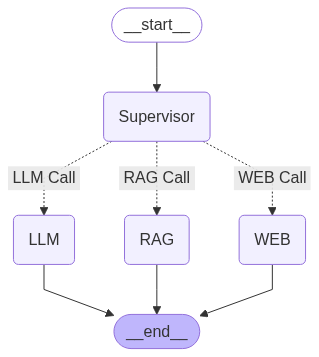

In [46]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [48]:
state={"messages":["How many miles for Cardiothoracic surgery in Network Adequacy?"]}
response=app.invoke(state)
print(response['messages'])

Question How many miles for Cardiothoracic surgery in Network Adequacy?
Parsed response: Topic='2026 Network Adequacy Rules for GA' Reasoning='The query explicitly asks about mileage requirements within the context of Network Adequacy, suggesting it relates to the 2026 rules.'
-> ROUTER ->
last_message: 2026 Network Adequacy Rules for GA
-> RAG Call ->
['How many miles for Cardiothoracic surgery in Network Adequacy?', '2026 Network Adequacy Rules for GA', 'The provided text gives varying distances for Cardiothoracic surgery.  In one instance, the baseline distance is 90 miles, and the alternative is 110 miles. Another row shows 90 miles as the baseline distance.']


In [49]:
state={"messages":["What are 2026 network adequacy facility type specialties"]}
app.invoke(state)

Question What are 2026 network adequacy facility type specialties
Parsed response: Topic='2026 Network Adequacy Rules for GA' Reasoning='The query explicitly asks about 2026 network adequacy and facility types, directly relating to the 2026 Network Adequacy Rules for GA.'
-> ROUTER ->
last_message: 2026 Network Adequacy Rules for GA
-> RAG Call ->


{'messages': ['What are 2026 network adequacy facility type specialties',
  '2026 Network Adequacy Rules for GA',
  "Based on the provided text,  2026 network adequacy facility type specialties are not specified.  The text lists various facility types and specialties, but doesn't specify which are relevant for 2026."]}

In [49]:
#validation
from langsmith import Client
from typing_extensions import Annotated, TypedDict

client = Client()

# Define the examples for the dataset
examples = [
    {
        "inputs": {"question": "What are 2026 Network Adequacy Time and Distance Rules for Cardiothoracic Surgery for Rural Counties in GA? "},
        "outputs": {"answer": "2026 Network Adequacy Time and Distance Rules for Cardiothoracic Surgery for Rural Counties in GA are Baseline Distance: 90 Miles, Baseline Time: 110 Minutes and Alternative Distance: 90 Miles"},
    },
    {
        "inputs": {"question": "What are 2026 Network Adequacy rural counties in GA?"},
        "outputs": {"answer": "GA Rural counties are Appling, Bacon, Calhoun, Charlton, Clay, Early, Glascock, Hancock, Jeff Davis, Lincoln, McIntosh, Marion, Meriwether, Miller, Mitchell, Quitman, Randolh, Stewart, Telfair, Warren, Wheeler and Wikes."},
    },
    {
        "inputs": {"question": "What are 2026 network adequacy facility type specialties?"},
        "outputs": {"answer": "2026 network adequacy facility type specialties are Acute Inpatient Hospitals(Must have emergency services available 24/7), Cardiac Catherization Services, Cardiac Surgery Program, Critical Care Services - Intensive Care Units (ICU), Diagnostic Radiology (Free-standing; hospital outpatient; ambulatory health facilities with Dx Radiology),Inpatient or Residential Behavioral Health Facility Services, Mammography, Outpatient Infusion/ Chemotherapy, Skilled Nursing Facilities, Surgical Services (Ambulatory Surgical Centers and Outpatient Hospital), Urgent Care."},
    },
]

In [50]:
# Create the dataset and examples in LangSmith
dataset_name = "2026 NetworkAdequcy Q&A"
if not client.has_dataset(dataset_name=dataset_name):
    dataset = client.create_dataset(dataset_name=dataset_name)
    client.create_examples(
        dataset_id=dataset.id,
        examples=examples
    )

In [51]:
# Grade output schema
from langchain_openai import ChatOpenAI
class CorrectnessGrade(TypedDict):
    # Note that the order in the fields are defined is the order in which the model will generate them.
    # It is useful to put explanations before responses because it forces the model to think through
    # its final response before generating it:
    explanation: Annotated[str, ..., "Explain your reasoning for the score"]
    correct: Annotated[bool, ..., "True if the answer is correct, False otherwise."]


# Grade prompt
correctness_instructions = """You are a teacher grading a quiz. 

You will be given a QUESTION, the GROUND TRUTH (correct) ANSWER, and the STUDENT ANSWER. 

Here is the grade criteria to follow:
(1) Grade the student answers based ONLY on their factual accuracy relative to the ground truth answer. 
(2) Ensure that the student answer does not contain any conflicting statements.
(3) It is OK if the student answer contains more information than the ground truth answer, as long as it is factually accurate relative to the  ground truth answer.

Correctness:
A correctness value of True means that the student's answer meets all of the criteria.
A correctness value of False means that the student's answer does not meet all of the criteria.

Explain your reasoning in a step-by-step manner to ensure your reasoning and conclusion are correct. 

Avoid simply stating the correct answer at the outset."""

# Grader LLM
grader_llm = ChatOpenAI(model="gpt-4o", temperature=0).with_structured_output(
    CorrectnessGrade, method="json_schema", strict=True
)


def correctness(inputs: dict, outputs: dict, reference_outputs: dict) -> bool:
    """An evaluator for RAG answer accuracy"""
    answers = f"""\
QUESTION: {inputs['question']}
GROUND TRUTH ANSWER: {reference_outputs['answer']}
STUDENT ANSWER: {outputs['answer']}"""

    # Run evaluator
    grade = grader_llm.invoke(
        [
            {"role": "system", "content": correctness_instructions},
            {"role": "user", "content": answers},
        ]
    )
    return grade["correct"]


In [64]:
#call original RAG model with same questions
def target(state: AgentState) -> dict:
    #state={"messages":["What are 2026 network adequacy facility type specialties"]}
    response=app.invoke(state)
    answer = response["messages"][-1]
    print(f"answer: {answer}") 
    return {"answer": answer}

In [65]:
#connect to Application
def validator_node(state: AgentState):
    print(f"state: {state}")
    #response=app.invoke(state)
    #answer = response["messages"][-1]
    #print(f"answer: {answer}") #got the answer
    dataset_name = "2026 NetworkAdequcy Q&A"
    #target={"answer":answer}
    experiment_results = client.evaluate(
        target,# replace with output from each node
        data = dataset_name,
        evaluators=[correctness],
        experiment_prefix="rag-doc-relevance",
        metadata={"version": "LCEL context, gpt-4-0125-preview"},
    )
    print(experiment_results)

In [66]:
state={"messages":["What are 2026 network adequacy facility type specialties"]}
validator_node(state)

state: {'messages': ['What are 2026 network adequacy facility type specialties']}


/Users/kuldeep/Documents/mriduladata/agenticAICourse/venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


View the evaluation results for experiment: 'rag-doc-relevance-fa2e2811' at:
https://smith.langchain.com/o/f66df77a-db78-4f2e-81dd-7cb71cce518e/datasets/f8c75eca-cf75-4cd7-98a2-e7ea5bee3f78/compare?selectedSessions=c47fe98a-45ae-49a8-952b-1cc8993d3583




0it [00:00, ?it/s]Error running target function: list index out of range
Traceback (most recent call last):
  File "/Users/kuldeep/Documents/mriduladata/agenticAICourse/venv/lib/python3.13/site-packages/langsmith/evaluation/_runner.py", line 1905, in _forward
    fn(*args, langsmith_extra=langsmith_extra)
    ~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/var/folders/2p/546b1qt146v9czmxms2shl1w0000gn/T/ipykernel_1794/397302377.py", line 4, in target
    response=app.invoke(state)
  File "/Users/kuldeep/Documents/mriduladata/agenticAICourse/venv/lib/python3.13/site-packages/langgraph/pregel/__init__.py", line 2719, in invoke
    for chunk in self.stream(
                 ~~~~~~~~~~~^
        input,
        ^^^^^^
    ...<7 lines>...
        **kwargs,
        ^^^^^^^^^
    ):
    ^
  File "/Users/kuldeep/Documents/mriduladata/agenticAICourse/venv/lib/python3.13/site-packages/langgraph/pregel/__init__.py", line 2436, in stream
    for _ in runner.tick(
             ~~~~~~~~~~~^
     

<ExperimentResults rag-doc-relevance-fa2e2811>


In [ ]:
state={"messages":["What are 2026 network adequacy facility type specialties"]}
app.invoke(state)

In [53]:
answer = state["messages"][-1]
print(f"answer: {answer}") # answer is not getting captured from graph so validator function always say incorrect

answer: How many miles for Cardiothoracic surgery in Network Adequacy?


In [54]:
state={"messages":["What are 2026 network adequacy facility type specialties"]}
response=app.invoke(state)

Question What are 2026 network adequacy facility type specialties
Parsed response: Topic='2026 Network Adequacy Rules for GA' Reasoning='The query explicitly asks about 2026 network adequacy facility type specialties, directly relating to the 2026 Network Adequacy Rules for GA.'
-> ROUTER ->
last_message: 2026 Network Adequacy Rules for GA
-> RAG Call ->


In [55]:
print(response)

{'messages': ['What are 2026 network adequacy facility type specialties', '2026 Network Adequacy Rules for GA', "Based on the provided text,  2026 network adequacy facility type specialties are not specified.  The text lists various facility types and specialties, but doesn't specify which are relevant for 2026."]}


In [56]:
response["messages"][-1]

"Based on the provided text,  2026 network adequacy facility type specialties are not specified.  The text lists various facility types and specialties, but doesn't specify which are relevant for 2026."